# Esercitazione 01 (10/10/2019)

(password: dsim1920)

Creato un nuovo ambiente per il progetto, si caricano le librerie necessarie:

In [1]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as wav

## Hello.wav

Si carica un file audio per iniziare l'analisi:

In [2]:
hello_rate, hello = wav.read("hello.wav")

Che ha una frequenza di campionamento pari a:

In [3]:
hello_rate

22050

e contiene una matrice di dati contenente i valori campionati su due canali (audio stereo): per l'analisi è usato solo il canale sinistro

In [4]:
hello.shape

(18859, 2)

In [5]:
hello = hello[:, 0]

In [6]:
ipd.Audio(hello, rate=hello_rate)

In [7]:
ipd.Audio(hello, rate=int(hello_rate / 2.5))

In [8]:
ipd.Audio(hello, rate=int(hello_rate * 2))

In [9]:
wav.write("hello_slow.wav", rate=int(hello_rate / 2.5), data=hello)

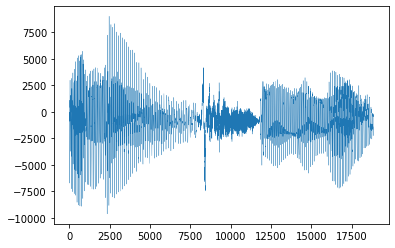

In [10]:
plt.plot(hello, lw=0.3)
plt.show()

# Whistle.wav & Voice.wav

In [11]:
whistle_rate, whistle = wav.read("whistle.wav")
voice_rate, voice = wav.read("voice.wav")

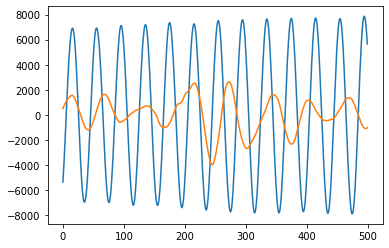

In [12]:
plt.plot(whistle[40000:40500])
plt.plot(voice[40000:40500])
plt.show()

Il primo suono (`whistle`) è una sinusoide quasi perfetta, mentre l'altro (`voice`) è nettamente meno regolare.
Il primo sarà quindi descritto da meno armoniche, mentre per il secondo sarà necessario effettuare una scomposizione più complessa.

In [13]:
from scipy.fftpack import rfft, fft, irfft, ifft, fftfreq

Si applica quindi una trasformata di Fourier al segnale

/opt/anaconda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


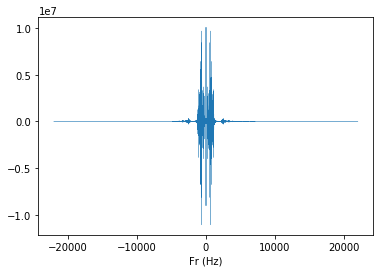

In [14]:
voice_fft = fft(voice)
voice_freqs = fftfreq(len(voice), 1.0 / voice_rate)
plt.plot(voice_freqs, voice_fft, lw=0.3)
plt.xlabel("Fr (Hz)")
plt.show()

Che, essendo simmetrica rispetto all'asse delle ordinate, di fatto viene analizzata solamente per valori positivi (per convenzione).

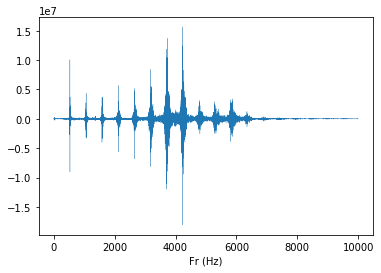

In [15]:
voice_ft = rfft(voice)
plt.plot(voice_ft[0:10000], lw=0.3)  # greater values are not so intresting (in this case)
plt.xlabel("Fr (Hz)")
plt.show()

È quindi possibile comprimere il segnale eliminando frequenze non chiaramente udibili all'orecchio umano.

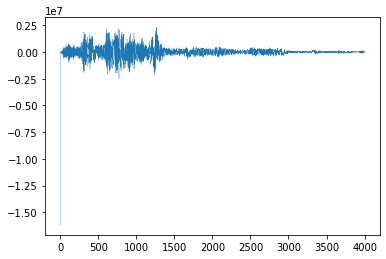

In [16]:
hello_ft = rfft(hello)
plt.plot(hello_ft[0:4000], lw=.3)
plt.show()

Si crea dunque un filtro passa-basso per eliminare le frequenze superiori a $1000Hz$

In [17]:
passa_basso = lambda x, lim: np.array([i for i in x[0:lim]] + [0 for i in x[lim:]])
hello_ft_pb = passa_basso(hello_ft, 1000)
ipd.Audio(irfft(hello_ft_pb), rate=hello_rate)

In [18]:
passa_alto = lambda x, lim: np.array([0 for i in x[0:lim]] + [i for i in x[lim:]])
hello_ft_pa = passa_alto(hello_ft, 2000)
ipd.Audio(irfft(hello_ft_pa), rate=hello_rate)

## Convulazione di due segnali

Il prodotto è come si presenta il primo segnale registrato nell'ambiente del secondo.

In [19]:
from scipy.signal import fftconvolve

In [20]:
violin_rate, violin = wav.read("violin.wav")
violin = violin[0:int(violin_rate * 2.0)]  # i primi 2 secondi
ipd.Audio(violin, rate=violin_rate)

In [21]:
bang1_rate, bang1 = wav.read("bang1.wav")

In [22]:
conv1 = fftconvolve(bang1, violin)
ipd.Audio(conv1, rate=violin_rate)

In [23]:
bang2_rate, bang2 = wav.read("bang2.wav")
bang2 = bang2[0:int(bang2_rate * 2.0)]
conv2 = fftconvolve(bang2, violin)
ipd.Audio(conv2, rate=violin_rate)